In [1]:
# Manipulating directory paths 
import os

# Manipulating json files
import json

# Plotting library
import matplotlib.pyplot as plt

# Plotting  and manipulating image, bounding box
from matplotlib import image
import matplotlib.patches as patches
import matplotlib.cm as mpcm
import numpy as np
# tells matplotlib to embed plots within the notebook
%matplotlib inline

# Tasks 

## 1.1 Load image

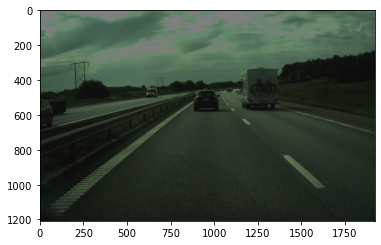

In [2]:
## Loading image Example
import matplotlib.image as mpimg

path= 'annotation_consistency/image1_FC_34243.jpg'
img = mpimg.imread(path)
imgplot = plt.imshow(img)


## 1.2 Draw annotations (bouding box coordinates) onto image

You can draw bounding box using `Rectangle()` from *matplotlib.patches* class. The `Rectangle()` draws a rectangle whose dimensions are specified as its parameters `xy, width, height`. The `xy=(x,y)` parameter specifies the bottom and left rectangle coordinates. 


Max x:  74.82678985595703 Min x:  0.6261528134346008
Max y:  667.11474609375 Min y:  512.8555297851562
Max x:  149.51559448242188 Min x:  48.954200744628906
Max y:  593.4022827148438 Min y:  517.2489624023438
Max x:  674.7800903320312 Min x:  610.831787109375
Max y:  504.0606994628906 Min y:  433.3486328125
Max x:  958.55322265625 Min x:  937.333251953125
Max y:  458.2188415527344 Min y:  449.4105224609375
Max x:  1030.2208251953125 Min x:  880.4796752929688
Max y:  581.9354248046875 Min y:  458.61920166015625
Max x:  1096.2830810546875 Min x:  1069.057373046875
Max y:  471.4312744140625 Min y:  448.20941162109375
Max x:  1106.69287109375 Min x:  1094.2811279296875
Max y:  460.62109375 Min y:  446.20751953125
Max x:  1363.33447265625 Min x:  1137.1212158203125
Max y:  572.006103515625 Min y:  329.3774719238281


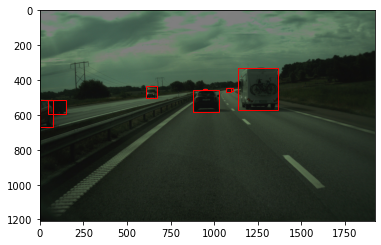

In [3]:
import matplotlib.image as mpimg
# create a figure
fig,ax = plt.subplots()
ax.imshow(img)
path = 'annotation_consistency/image1_FC_34243.jpg'
file = open("annotation_consistency/image1_FC_34243_judgements.json")
# load json data
data = json.load(file)
# choose '0' annotation entry, define min_x,min_y, max_x, max_y for further calculation
for i in data['0']:
    min_x = 1000000
    max_x = 0
    min_y = 1000000
    max_y = 0
    # get min_x, max_x, min_y and min_y value in the loop
    for coords in i['boundaries'][0]['boundaryPoints']:
        if min_x > coords['coords'][0]:
            min_x = coords['coords'][0]
        if max_x < coords['coords'][0]:
             max_x = coords['coords'][0]
        if min_y > coords['coords'][1]:
            min_y = coords['coords'][1]
        if max_y < coords['coords'][1]:
            max_y = coords['coords'][1]
    # draw a rectangle with bottome left xy = min_x, min_y; width = max_x - min_x, height = max_y - min_y, edge color is red       
    rect_i  = patches.Rectangle((min_x, min_y),(max_x - min_x), (max_y-min_y),linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect_i) 
    print('Max x: ', max_x, 'Min x: ', min_x)
    print('Max y: ', max_y, 'Min y: ', min_y)
    
plt.show() #show all patches in the plot

## 2 Draw all boxes avalibale for the same image onto the image

Max x:  74.82678985595703 Min x:  0.6261528134346008
Max y:  667.11474609375 Min y:  512.8555297851562
Max x:  149.51559448242188 Min x:  48.954200744628906
Max y:  593.4022827148438 Min y:  517.2489624023438
Max x:  674.7800903320312 Min x:  610.831787109375
Max y:  504.0606994628906 Min y:  433.3486328125
Max x:  958.55322265625 Min x:  937.333251953125
Max y:  458.2188415527344 Min y:  449.4105224609375
Max x:  1030.2208251953125 Min x:  880.4796752929688
Max y:  581.9354248046875 Min y:  458.61920166015625
Max x:  1096.2830810546875 Min x:  1069.057373046875
Max y:  471.4312744140625 Min y:  448.20941162109375
Max x:  1106.69287109375 Min x:  1094.2811279296875
Max y:  460.62109375 Min y:  446.20751953125
Max x:  1363.33447265625 Min x:  1137.1212158203125
Max y:  572.006103515625 Min y:  329.3774719238281
Max x:  674.91015625 Min x:  609.6201171875
Max y:  505.43084716796875 Min y:  433.4197692871094
Max x:  76.6238021850586 Min x:  0.282182514667511
Max y:  664.5579833984375 Min 

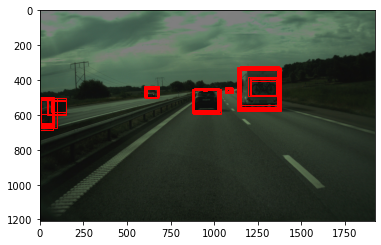

In [4]:
import matplotlib.image as mpimg

fig,ax = plt.subplots()
ax.imshow(img)
path = 'annotation_consistency/image1_FC_34243.jpg'
file = open("annotation_consistency/image1_FC_34243_judgements.json")
data = json.load(file)

# in each annotation entry, get min_x, max_x, min_y, max_y value in the loop 
for x in data:
    for i in data[x]:
        min_x = 1000000
        max_x = 0
        min_y = 1000000
        max_y = 0
        if(len(i['boundaries']) != 0):
            for coords in i['boundaries'][0]['boundaryPoints']:
                if min_x > coords['coords'][0]:
                    min_x = coords['coords'][0]
                if max_x < coords['coords'][0]:
                    max_x = coords['coords'][0]
                if min_y > coords['coords'][1]:
                    min_y = coords['coords'][1]
                if max_y < coords['coords'][1]:
                    max_y = coords['coords'][1]
            rect_i  = patches.Rectangle((min_x, min_y),(max_x - min_x), (max_y-min_y),linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect_i)
            print('Max x: ', max_x, 'Min x: ', min_x)
            print('Max y: ', max_y, 'Min y: ', min_y)

plt.show()

## 3 Pick two annotators and draw their annotations onto an image 
In this task, you will select two annotators and draw the bounding boxes provided by the two annotators on a single image

Max red x:  74.82678985595703 Min red x:  0.6261528134346008
Max red y:  667.11474609375 Min red y:  512.8555297851562
Max red x:  149.51559448242188 Min red x:  48.954200744628906
Max red y:  593.4022827148438 Min red y:  517.2489624023438
Max red x:  674.7800903320312 Min red x:  610.831787109375
Max red y:  504.0606994628906 Min red y:  433.3486328125
Max red x:  958.55322265625 Min red x:  937.333251953125
Max red y:  458.2188415527344 Min red y:  449.4105224609375
Max red x:  1030.2208251953125 Min red x:  880.4796752929688
Max red y:  581.9354248046875 Min red y:  458.61920166015625
Max red x:  1096.2830810546875 Min red x:  1069.057373046875
Max red y:  471.4312744140625 Min red y:  448.20941162109375
Max red x:  1106.69287109375 Min red x:  1094.2811279296875
Max red y:  460.62109375 Min red y:  446.20751953125
Max red x:  1363.33447265625 Min red x:  1137.1212158203125
Max red y:  572.006103515625 Min red y:  329.3774719238281
Max blue x:  1368.0853271484375 Min blue x:  1145.

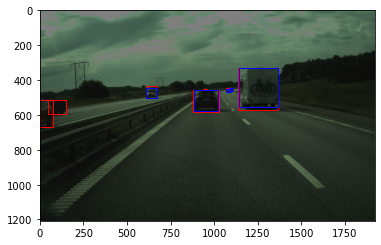

In [5]:
import matplotlib.image as mpimg

fig,ax = plt.subplots()
ax.imshow(img)
path = 'annotation_consistency/image1_FC_34243.jpg'
file = open("annotation_consistency/image1_FC_34243_judgements.json")
data = json.load(file)

#pick '0' annotation entry with red edge color 
r = 0
rect_r = []
for i in data['0']:
    min_x = 1000000
    max_x = 0
    min_y = 1000000
    max_y = 0
    for coords in i['boundaries'][0]['boundaryPoints']:
        if min_x > coords['coords'][0]:
            min_x = coords['coords'][0]
        if max_x < coords['coords'][0]:
             max_x = coords['coords'][0]
        if min_y > coords['coords'][1]:
            min_y = coords['coords'][1]
        if max_y < coords['coords'][1]:
            max_y = coords['coords'][1]
    print('Max red x: ', max_x, 'Min red x: ', min_x)
    print('Max red y: ', max_y, 'Min red y: ', min_y)
    rect_r.append(patches.Rectangle((min_x, min_y),(max_x - min_x), (max_y-min_y),linewidth=1, edgecolor='r', facecolor='none'))
    ax.add_patch(rect_r[r])
    r+=1

# pick '2' annotation entry with blue edge color 
b = 0
rect_b = []
for i in data['2']:
    min_x = 1000000
    max_x = 0
    min_y = 1000000
    max_y = 0
    for coords in i['boundaries'][0]['boundaryPoints']:
        if min_x > coords['coords'][0]:
            min_x = coords['coords'][0]
        if max_x < coords['coords'][0]:
             max_x = coords['coords'][0]
        if min_y > coords['coords'][1]:
            min_y = coords['coords'][1]
        if max_y < coords['coords'][1]:
            max_y = coords['coords'][1]
    print('Max blue x: ', max_x, 'Min blue x: ', min_x)
    print('Max blue y: ', max_y, 'Min blue y: ', min_y)
    rect_b.append(patches.Rectangle((min_x, min_y),(max_x - min_x), (max_y-min_y),linewidth=1, edgecolor='b', facecolor='none'))
    ax.add_patch(rect_b[b])
    b+=1
    
plt.show() 

## 4 Compute the IOU between the annotations of the two annotators

Compute the IOU from the annotations of the two annotators.

In [6]:
def compute_iou(rec1, rec2):
    rec1_x = rec1.xy[0]
    rec1_max_x = rec1.xy[0]+rec1.get_width()
    rec1_y = rec1.xy[1]
    rec1_max_y = rec1.xy[1] + rec1.get_height()
    
    rec2_x = rec2.xy[0]
    rec2_max_x = rec2.xy[0]+rec2.get_width()
    rec2_y = rec2.xy[1]
    rec2_max_y = rec2.xy[1] + rec2.get_height()
    
    area_rec1 = (rec1_max_x - rec1_x) * (rec1_max_y - rec1_y)
    area_rec2 = (rec2_max_x - rec2_x) * (rec2_max_y - rec2_y)

   
    #find each edge of intersect rectangle 
    x_left = max(rec1_x, rec2_x)
    y_top = max(rec1_y, rec2_y)
    x_right = min(rec1_max_x, rec2_max_x)
    y_bottom = min(rec1_max_y, rec2_max_y)
    
    #judge if there is an intersect 
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    
    intersection = (x_right - x_left) * (y_bottom - y_top)
    
    iou = intersection / (area_rec1 + area_rec2 - intersection)
    return iou
    
for i in range(len(rect_b)):
    print('IOU in box',[i], 'is:', compute_iou(rect_b[i], rect_r[i]))
    

IOU in box [0] is: 0.0
IOU in box [1] is: 0.0
IOU in box [2] is: 0.0
IOU in box [3] is: 0.0
IOU in box [4] is: 0.8891415483580131
